### Import Packages and Modules

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.naive_bayes import GaussianNB

### Avoid Unwanted Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [3]:
df = pd.read_csv("ChurnData.csv", na_values="?")
df.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0,1.0,2.553,3.248,4.143,2.0,0.0


### Preliminary Deal with Dataset

In [4]:
df.shape

(200, 28)

In [5]:
df.isna().sum()

tenure       5
age          4
address      2
income       2
ed           2
employ       4
equip        1
callcard     1
wireless     2
longmon      9
tollmon      2
equipmon     4
cardmon     10
wiremon      2
longten      9
tollten      8
cardten      4
voice        4
pager        1
internet     2
callwait     2
confer       0
ebill        4
loglong      9
logtoll      7
lninc        4
custcat      1
churn        1
dtype: int64

In [6]:
df.replace("?", np.NaN)
df.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0,1.0,2.553,3.248,4.143,2.0,0.0


In [7]:
df.fillna(round(df.mean(),2), inplace=True)
df.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0,1.0,2.553,3.248,4.143,2.0,0.0


In [8]:
df.isna().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [9]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,35.533250,41.32140,11.676800,75.313100,2.813100,10.102000,0.427150,0.703500,0.292900,11.814450,...,0.27135,0.439400,0.454500,0.460000,0.449000,2.20670,3.230185,3.958290,2.467350,0.291450
std,21.296015,12.98835,10.150454,128.407458,1.276155,8.850506,0.494662,0.456706,0.453961,9.692254,...,0.44466,0.495065,0.496677,0.499648,0.493627,0.71579,0.280410,0.750199,1.073991,0.454434
min,1.000000,19.00000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.100000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.09500,1.749000,2.197000,1.000000,0.000000
25%,17.000000,32.00000,3.000000,31.000000,2.000000,3.000000,0.000000,0.000000,0.000000,5.887500,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.78100,3.229000,3.481250,2.000000,0.000000
50%,34.500000,40.00000,9.000000,48.000000,3.000000,8.000000,0.000000,1.000000,0.000000,8.650000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2.16050,3.240000,3.922000,2.000000,0.000000
75%,54.250000,51.00000,18.000000,80.000000,4.000000,16.250000,1.000000,1.000000,1.000000,14.212500,...,1.00000,1.000000,1.000000,1.000000,1.000000,2.65775,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.00000,48.000000,1668.000000,5.000000,44.000000,1.000000,1.000000,1.000000,62.300000,...,1.00000,1.000000,1.000000,1.000000,1.000000,4.13200,4.227000,7.419000,4.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [11]:
df['churn'] = df['churn'].astype('int')
df['confer'] = df['confer'].astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

### Define Independent and Dependent Variables for Implement Models

In [13]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager', 'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll', 'lninc', 'custcat']])
y = np.asarray(df['churn'])

In [14]:
X[0:5]

array([[1.10000e+01, 3.30000e+01, 7.00000e+00, 1.36000e+02, 5.00000e+00,
        5.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 4.40000e+00,
        2.07500e+01, 0.00000e+00, 1.52500e+01, 3.57000e+01, 4.20000e+01,
        2.11450e+02, 1.25000e+02, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 1.48200e+00, 3.03300e+00,
        4.91300e+00, 4.00000e+00],
       [3.30000e+01, 3.30000e+01, 1.20000e+01, 3.30000e+01, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 9.45000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.88800e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.24600e+00, 3.24000e+00,
        3.49700e+00, 1.00000e+00],
       [2.30000e+01, 3.00000e+01, 9.00000e+00, 3.00000e+01, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.30000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000

In [15]:
y[0:5]

array([1, 1, 0, 0, 0])

### Normalize Dataset

In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.15490216, -0.64228958, -0.46190405,  0.47379794,  1.71796325,
        -0.57791081, -0.86568526,  0.65084286,  1.56152998, -0.76690682,
         0.49257819, -0.80541825,  0.07832391,  1.08429977, -0.72769554,
        -0.36370616, -0.56118953,  1.5774911 ,  1.64278078, -0.88978796,
         1.10105505,  1.08347268, -0.91187675, -1.01498909, -0.70496775,
         1.27580253,  1.43064203],
       [-0.11925268, -0.64228958,  0.03192084, -0.33034904, -0.63874705,
        -1.14426794, -0.86568526, -1.54424267, -0.64682807, -0.24456471,
        -0.84280168, -0.80541825, -0.9749738 , -0.57281344, -0.38564872,
        -0.62497903, -0.69594176, -0.64683363, -0.61177323, -0.88978796,
        -0.91737768, -0.92295821, -0.91187675,  0.05504218,  0.03509019,
        -0.61643321, -1.36968817],
       [-0.59000245, -0.87384541, -0.2643741 , -0.3537708 , -1.42431715,
        -0.91772509, -0.86568526, -1.54424267, -0.64682807, -0.57038206,
        -0.84280168, -0.80541825, -0.9749738 , -0.5728

### Spliting for Train & Test Dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (150, 27) (150,)
Test set: (50, 27) (50,)


### Gaussian Naive Bayes

In [18]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred_gnb = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test,y_test) * 100, 2)
print("Gaussian Naive Bayes Accuracy: ", acc_gaussian)

Gaussian Naive Bayes Accuracy:  68.0


In [19]:
cvs_gnb = round((cross_val_score(gaussian, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_gnb)

Cross Validated Score: 67.5


In [20]:
class_report = classification_report(y_test, Y_pred_gnb)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.80      0.71      0.75        34
           1       0.50      0.62      0.56        16

    accuracy                           0.68        50
   macro avg       0.65      0.67      0.65        50
weighted avg       0.70      0.68      0.69        50



### Confusion Matrix

Text(0.5, 1.05, 'Confusion Matrix (Gaussian Naive Bayes)')

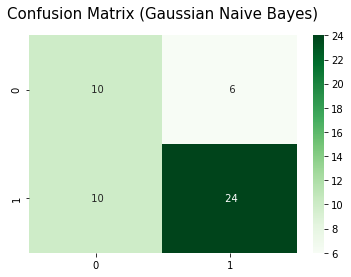

In [21]:
cnf_matrix = confusion_matrix(y_test, Y_pred_gnb, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="Greens")
plt.title('Confusion Matrix (Gaussian Naive Bayes)', y=1.05, size=15)

### Jaccard Score

In [22]:
jac_score_gaussian = round(jaccard_score(y_test, Y_pred_gnb, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_gaussian)

Jaccard Score:  60.0


### Mean Absolute Error & Mean Squard Error

In [23]:
gnb_mae = round((mean_absolute_error(y_test, Y_pred_gnb)*100), 2)
gnb_mse = round((mean_squared_error(y_test, Y_pred_gnb)*100), 2)
print("Mean Absolute Error: ", gnb_mae)
print("Mean Squared Error: ", gnb_mse)

Mean Absolute Error:  32.0
Mean Squared Error:  32.0


### ROC AUC Score

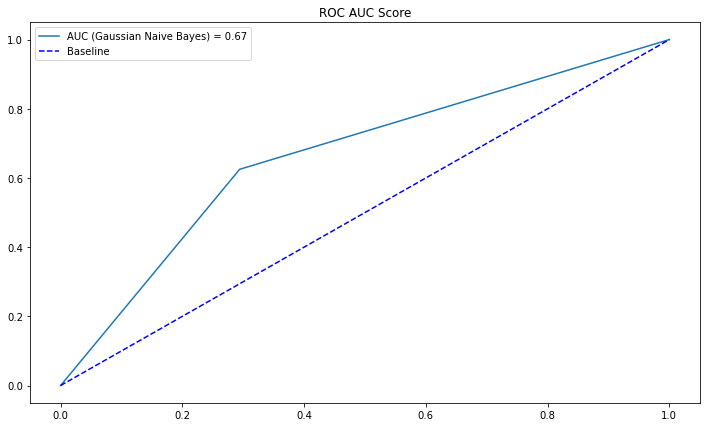

In [24]:
auc_gnb = roc_auc_score(y_test, Y_pred_gnb)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, Y_pred_gnb)
plt.figure(figsize=(12, 7))
plt.plot(fpr_gnb, tpr_gnb, label=f'AUC (Gaussian Naive Bayes) = {auc_gnb:.2f}')
plt.title('ROC AUC Score')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.legend()